In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Preprocessing

In [52]:
path='D:/DataSets/365/TimeSeries/3/index2018.csv'
df_raw=pd.read_csv(path)
df=df_raw.copy()

In [53]:
df.date=pd.to_datetime(df.date,dayfirst=True)
df.set_index('date',inplace=True)

In [54]:
#df.index=pd.to_datetime(df.index,dayfirst=True)

In [55]:
df.asfreq('b')
df=df.fillna(method='ffill')

### Removing surplus data

In [56]:
df['market_value']=df.spx

In [57]:
df.columns

Index(['spx', 'dax', 'ftse', 'nikkei', 'market_value'], dtype='object')

In [58]:
del df['spx'], df['dax'],df['ftse'],df['nikkei']

### Split the data

In [59]:
size=int(len(df)*0.8)
df_train=df.iloc[:size]
df_test=df.iloc[size:]

In [60]:
df_train.tail()

,market_value
date,
2013-03-28,1569.185872
2013-03-29,1569.185872
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [61]:
df_test.head()

,market_value
date,
2013-04-04,1559.979316
2013-04-05,1553.278930
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827


# White Noise

In [62]:
# Generate White Noise data with an array of random values from a normal distribution. We should set the size, the mean and the std as it ouccure in the our df before
# Look at the documentation for np.random.normal
#Now we can merge or add the df and the wn array together

wn=np.random.normal(loc=df.market_value.mean(),
                    scale=df.market_value.std(),
                    size=len(df)
                   )

df['wn']=wn

In [63]:
df.describe()

,market_value,wn
count,6269.000000,6269.000000
mean,1288.127542,1295.570661
std,487.586473,478.261914
min,438.920000,-425.137665
25%,990.671905,973.683622
50%,1233.420000,1300.002593
75%,1459.987747,1615.300905
max,2872.867839,3215.905318


Text(0.5, 1.0, 'White Noise Time-series')

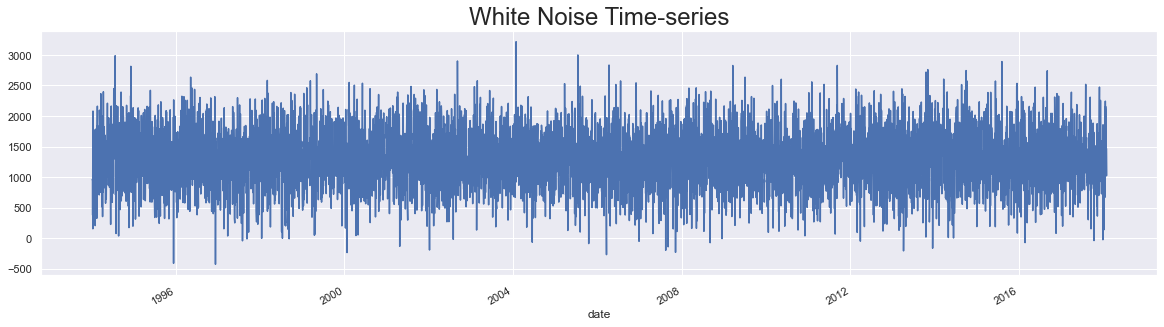

In [71]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time-series',size=24)


There is no clear pattern in the white noise<br>
 - same mean
 

Text(0.5, 1.0, 'S&P closings')

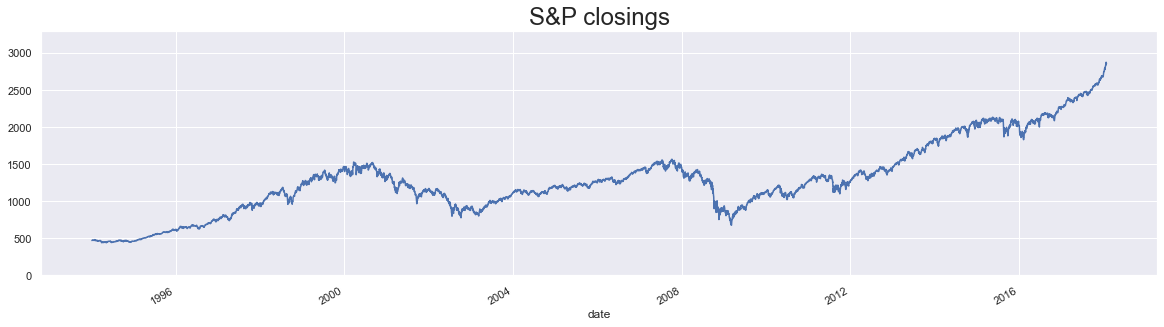

In [72]:
df.market_value.plot(figsize=(20,5))
plt.ylim(0,3300) # To adjust the same scale as in the White Noise

plt.title('S&P closings',size=24)